Анализируемая функция:
$$f(x)=2^x$$
на отрезке $[a, b] = [0, 1]$.

# 0. Необходимые библиотеки. График функции.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics

In [ ]:
def f(x):
    return 2**x

a = 0
b = 1

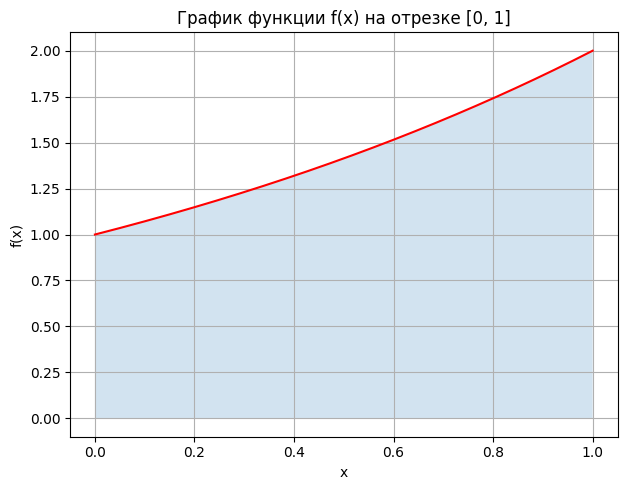

In [ ]:
plt.figure(figsize=(12, 5))

x = np.linspace(a, b, 1000)
plt.subplot(1, 2, 2)
plt.plot(x, f(x), 'r-')
plt.fill_between(x, f(x), alpha=0.2)
plt.title(f"График функции f(x) на отрезке [{a}, {b}]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

plt.tight_layout()

# 1. Разбиение промежутка на отрезки.

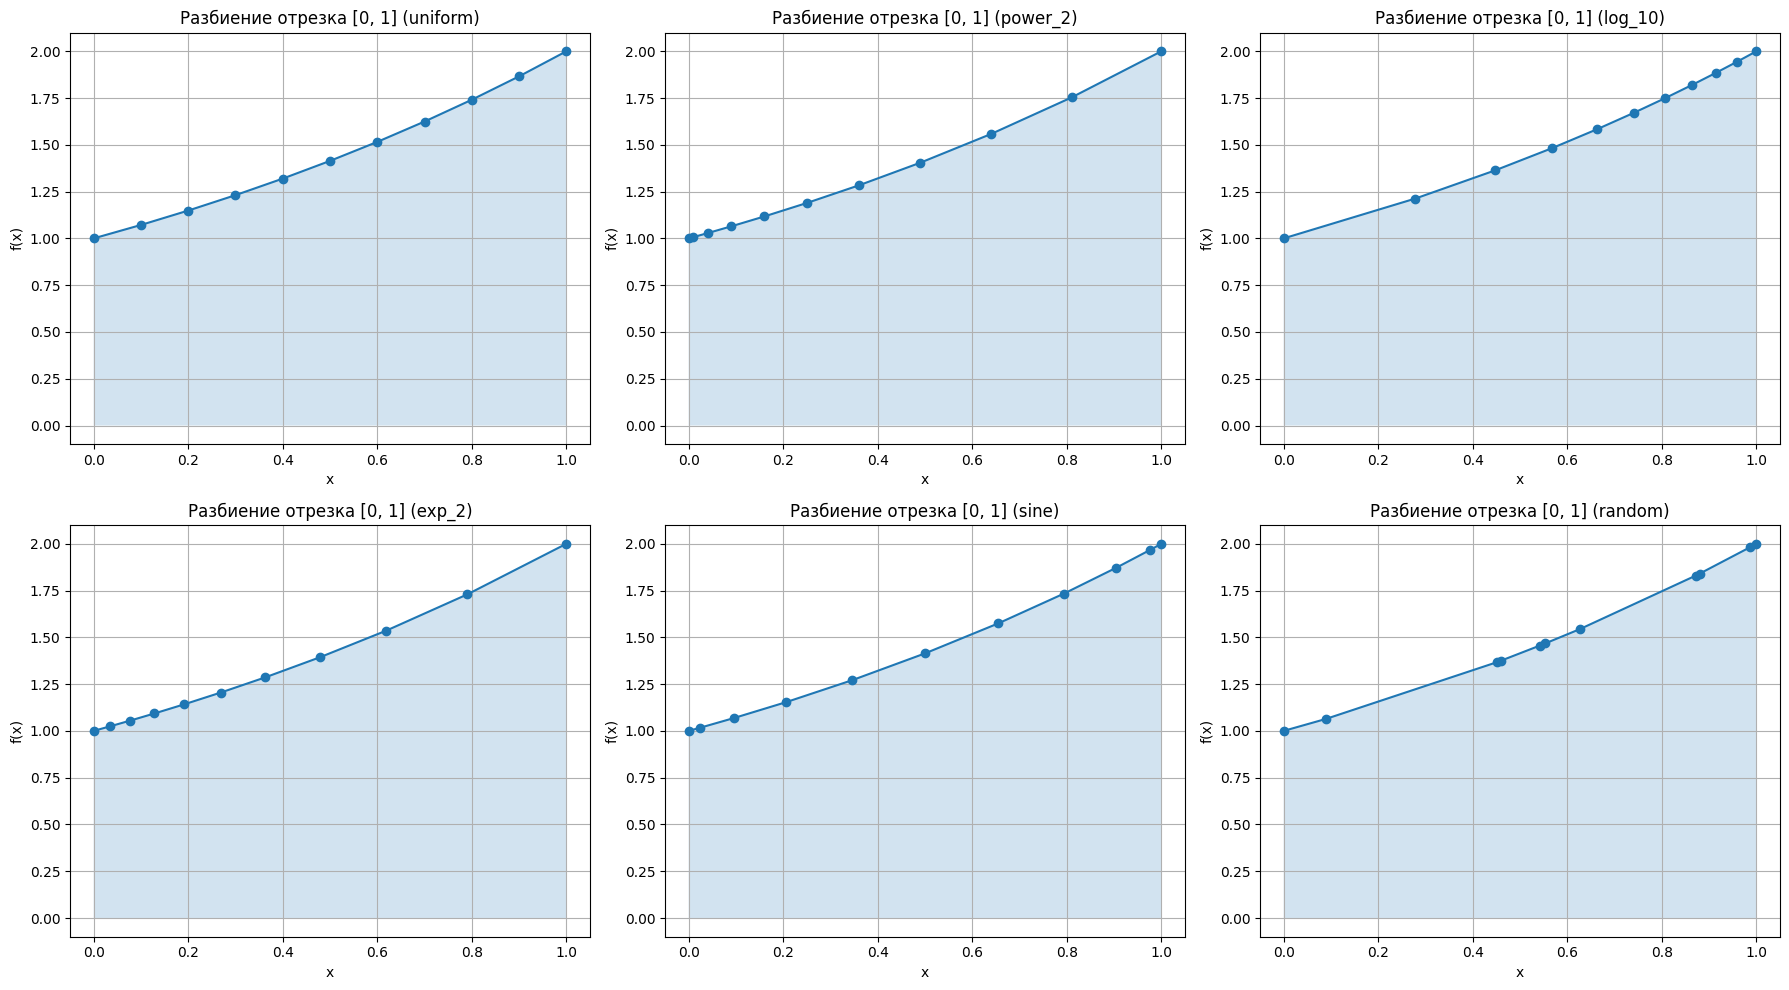

In [ ]:
def get_partition(a, b, n=10, type='uniform', **kwargs):
    t = np.linspace(0, 1, n + 1)

    if type == "uniform":
        x = t
    elif type == "power":
        alpha = kwargs.get("alpha", 2.0)
        x = t ** alpha
    elif type == "log":
        base = kwargs.get("base", 10)
        log_t = np.linspace(1, base, n + 1)
        x = np.log(log_t) / np.log(base)
    elif type == "exp":
        rate = kwargs.get("rate", 2.0)
        x = (np.exp(rate * t) - 1) / (np.exp(rate) - 1)
    elif type == "sine":
        x = (1 - np.cos(np.pi * t)) / 2
    elif type == "random":
        x = np.sort(np.random.rand(n - 1))
        x = np.concatenate([[0], x, [1]])

    return a + (b - a) * x


partitions = {
    "uniform": get_partition(a, b, type="uniform"),
    "power_2": get_partition(a, b, type="power", alpha=2),
    "log_10": get_partition(a, b, type="log", base=10),
    "exp_2": get_partition(a, b, type="exp", rate=2),
    "sine": get_partition(a, b, type="sine"),
    "random": get_partition(a, b, type="random"),
}

plt.figure(figsize=(18, 10))
for i, (name, x) in enumerate(partitions.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(x, f(x), 'o-')
    plt.fill_between(x, f(x), alpha=0.2)
    plt.title(f"Разбиение отрезка [{a}, {b}] ({name})")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
plt.tight_layout()
plt.show()

# 2. Интегральные суммы различными методами.


## 2.1. Метод прямоугольников.

### 2.1.1. Метод левых прямоугольников.


In [ ]:
def integral_left_rectangle(f, a, b, n, plot=False, **kwargs):
    x = get_partition(a, b, n, **kwargs)
    integral_sm = 0

    for i in range(n):
        integral_sm += f(x[i]) * (x[i + 1] - x[i])

    if plot:
        plt.figure(figsize=(12, 10))
        plt.subplot(2, 1, 1)
        plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
        plt.scatter(x, f(x), color='b')

        for i in range(n):
            x_left = x[i]
            x_right = x[i + 1]
            y_val = f(x_left)
            X_rect = [x_left, x_right, x_right, x_left, x_left]
            Y_rect = [0, 0, y_val, y_val, 0]
            plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')

        plt.title(f"Метод левых прямоугольников на отрезке [{a}, {b}], при n={n}\n"
                  f"Итегральная сумма: {integral_sm}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid()
        plt.tight_layout()
        plt.show()

    return integral_sm

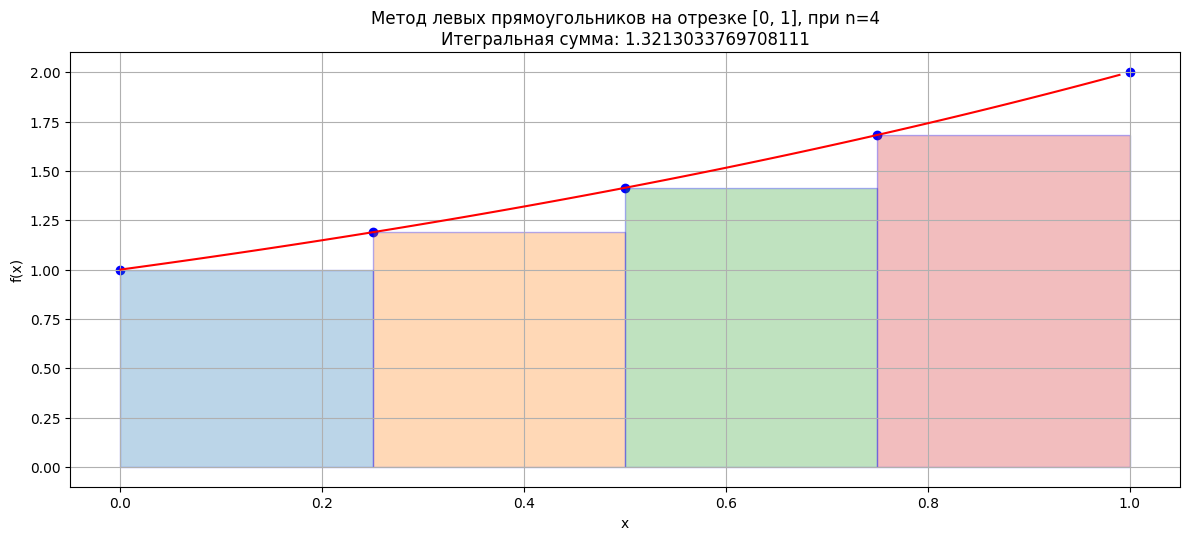

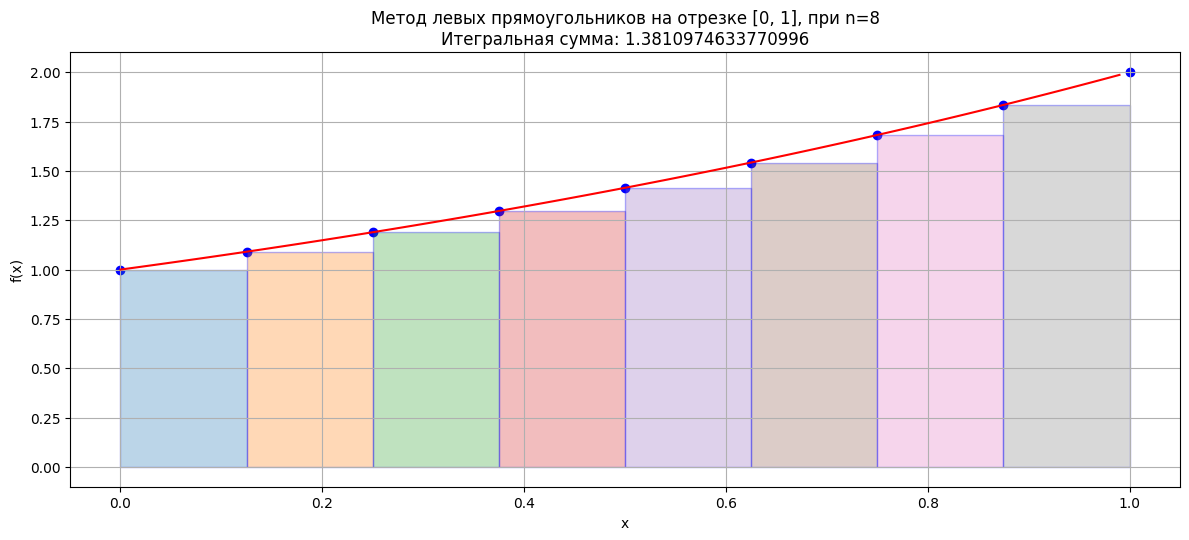

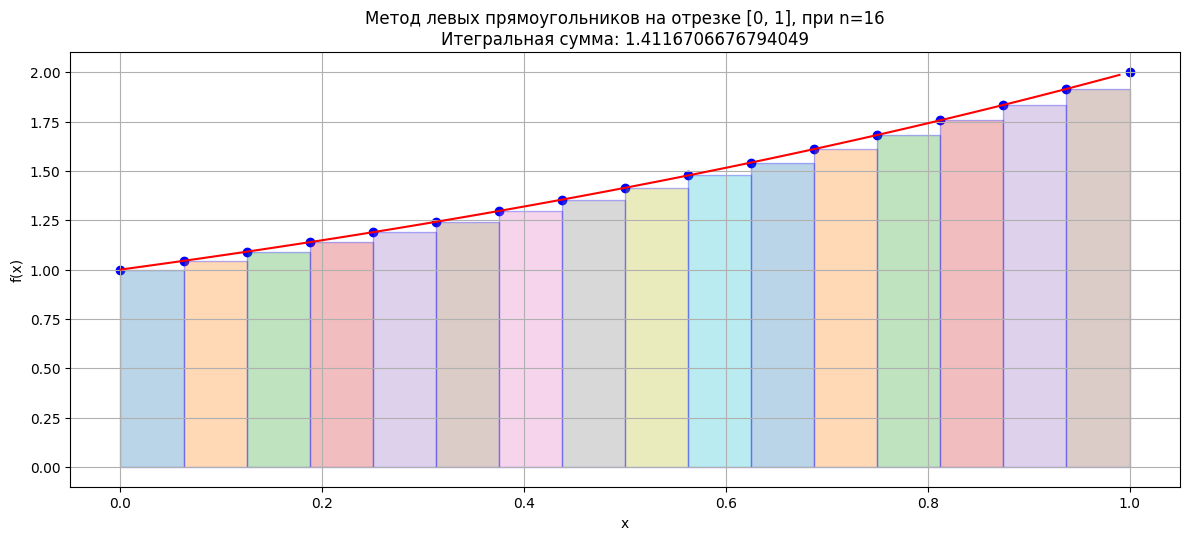

np.float64(1.4116706676794049)

In [ ]:
integral_left_rectangle(f, a, b, 4, plot=True)
integral_left_rectangle(f, a, b, 8, plot=True)
integral_left_rectangle(f, a, b, 16, plot=True)

### 2.1.2. Метод правых прямоугольников.

In [ ]:
def integral_right_rectangle(f, a, b, n, plot=False, **kwargs):
    x = get_partition(a, b, n, **kwargs)
    integral_sm = 0

    for i in range(n):
        integral_sm += f(x[i + 1]) * (x[i + 1] - x[i])

    if plot:
        plt.figure(figsize=(12, 10))
        plt.subplot(2, 1, 1)
        plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
        plt.scatter(x, f(x), color='b')

        for i in range(n):
            x_left = x[i]
            x_right = x[i + 1]
            y_val = f(x_right)
            X_rect = [x_left, x_right, x_right, x_left, x_left]
            Y_rect = [0, 0, y_val, y_val, 0]
            plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')

        plt.title(f"Метод левых прямоугольников на отрезке [{a}, {b}], при n={n}\n"
                  f"Итегральная сумма: {integral_sm}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid()
        plt.tight_layout()
        plt.show()

    return integral_sm

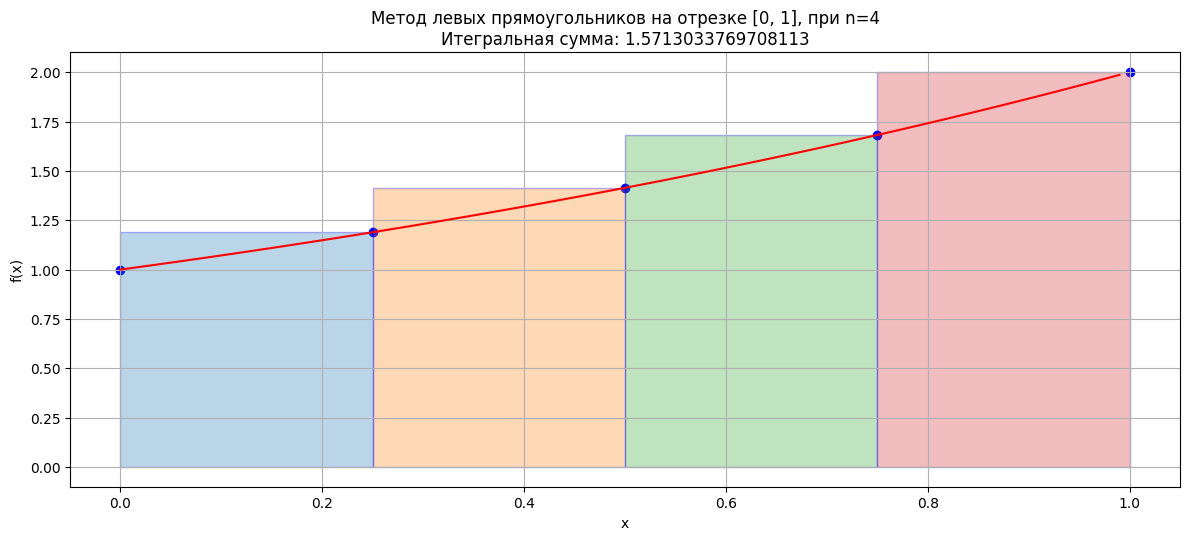

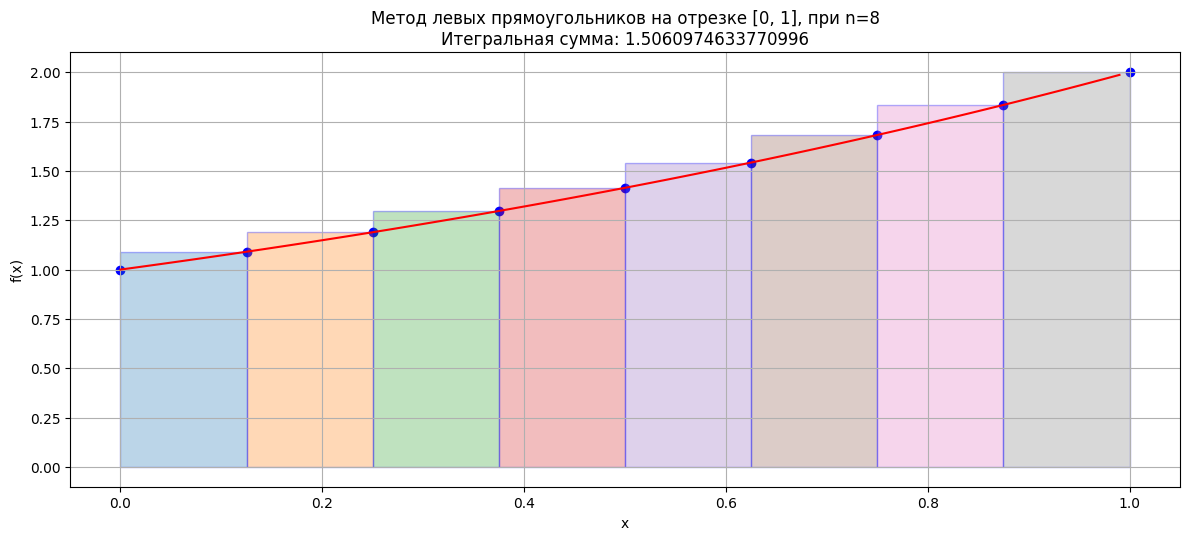

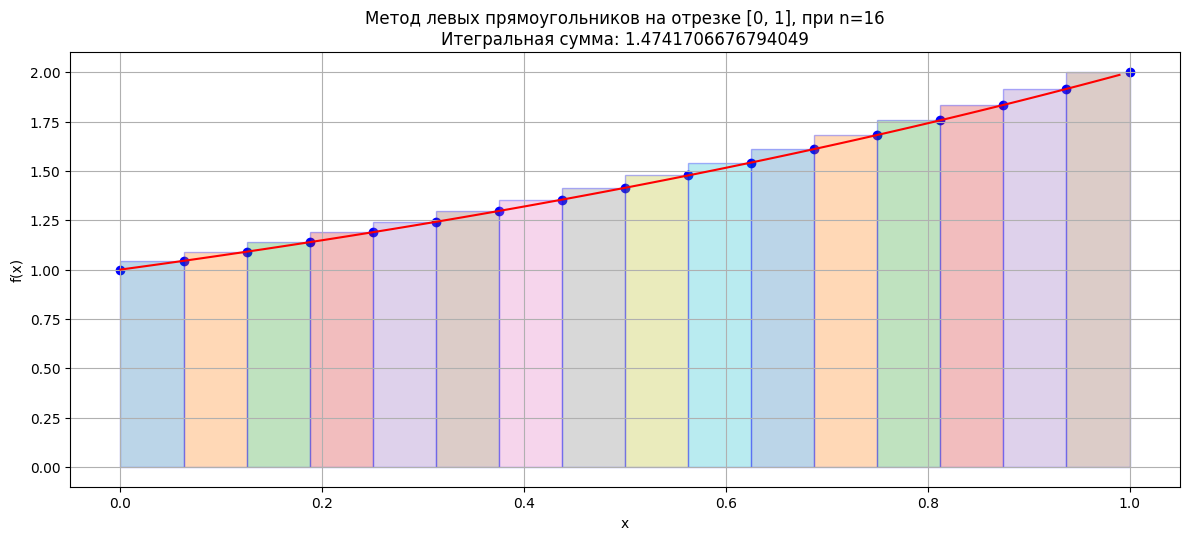

np.float64(1.4741706676794049)

In [ ]:
integral_right_rectangle(f, a, b, 4, plot=True)
integral_right_rectangle(f, a, b, 8, plot=True)
integral_right_rectangle(f, a, b, 16, plot=True)

### 2.1.3. Метод средних прямоугольгиков.

In [ ]:
def integral_mean_rectangle(f, a, b, n, plot=False, **kwargs):
    x = get_partition(a, b, n, **kwargs)
    integral_sm = 0

    if plot:
        x_plot = []

        for i in range(n):
            integral_sm += f((x[i] + x[i + 1]) / 2) * (x[i + 1] - x[i])
            x_plot.append((x[i] + x[i + 1]) / 2)

        plt.figure(figsize=(12, 10))
        x_plot.sort()
        plt.subplot(2, 1, 1)
        plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
        plt.scatter(x_plot, f(np.array(x_plot)), color='b')

        for i in range(n):
            x_left = x[i]
            x_right = x[i + 1]
            y_val = f((x_left + x_right) / 2)
            X_rect = [x_left, x_right, x_right, x_left, x_left]
            Y_rect = [0, 0, y_val, y_val, 0]
            plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')

        plt.title(f"Метод средних прямоугольников на отрезке [{a}, {b}], при n={n}\n"
                  f"Интегральная сумма: {integral_sm}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid()
        plt.tight_layout()
        plt.show()

    else:
      for i in range(n):
            integral_sm += f((x[i] + x[i + 1]) / 2) * (x[i + 1] - x[i])

    return integral_sm

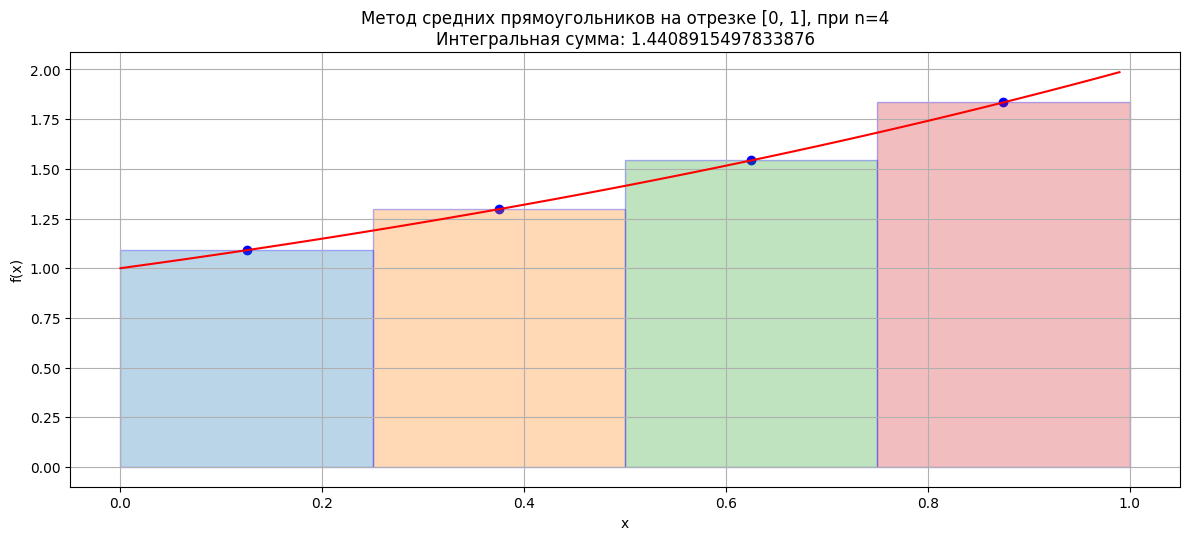

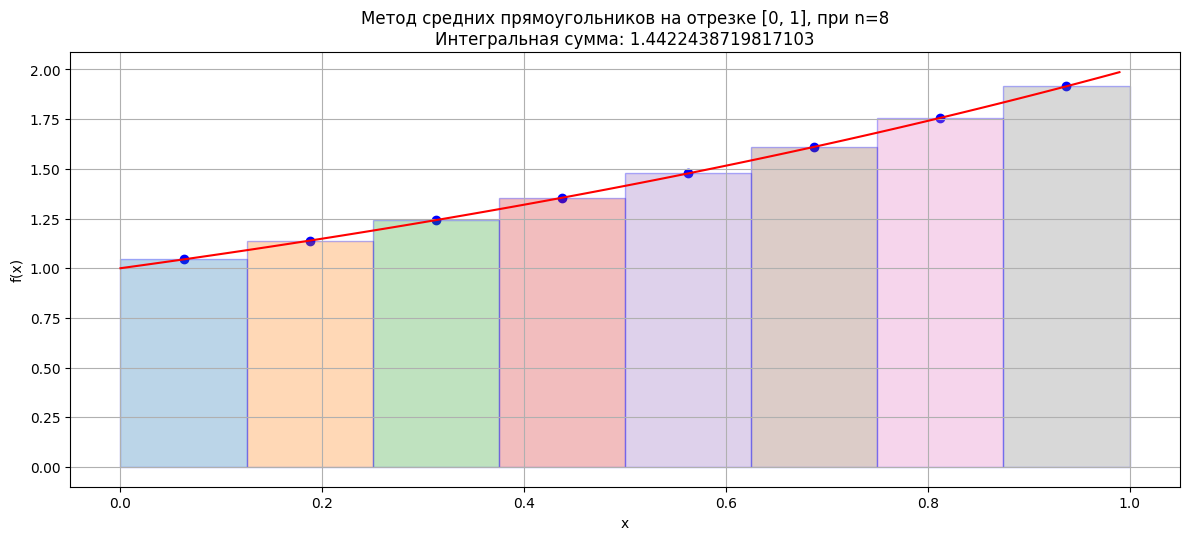

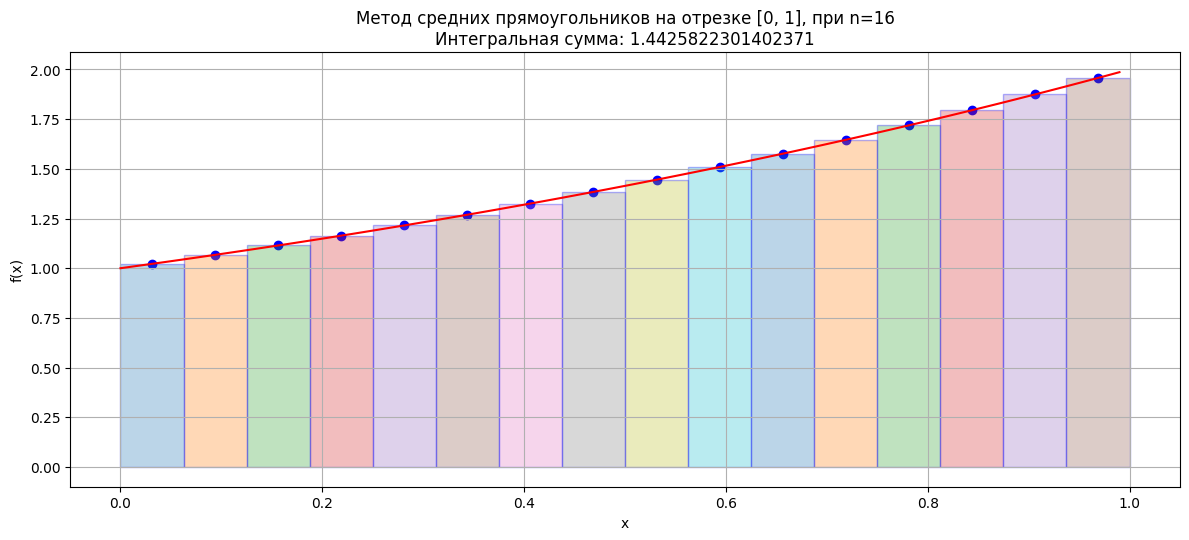

np.float64(1.4425822301402371)

In [ ]:
integral_mean_rectangle(f, a, b, 4, plot=True)
integral_mean_rectangle(f, a, b, 8, plot=True)
integral_mean_rectangle(f, a, b, 16, plot=True)

## 2.2 Метод трапеции

In [ ]:
def integral_trapezoid(f, a, b, n, plot=False, **kwargs):
    x = get_partition(a, b, n, **kwargs)
    sm_integral = 0

    for i in range(n):
        sm_integral += (f(x[i]) + f(x[i + 1])) * (x[i + 1] - x[i]) / 2

    if plot:
        plt.figure(figsize=(12, 10))
        plt.subplot(2, 1, 1)
        plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
        plt.scatter(x, f(x), color='b')
        for i in range(n):
            x_left = x[i]
            x_right = x[i + 1]
            y_val_left = f(x_left)
            y_val_right = f(x_right)
            X_rect = [x_left, x_right, x_right, x_left, x_left]
            Y_rect = [0, 0, y_val_right, y_val_left, 0]
            plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
        plt.title(f"Метод трапеций на отрезке [{a}, {b}], при n={n}\n"
                  f"Интегральная сумма: {sm_integral}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid()
        plt.tight_layout()
        plt.show()

    return sm_integral

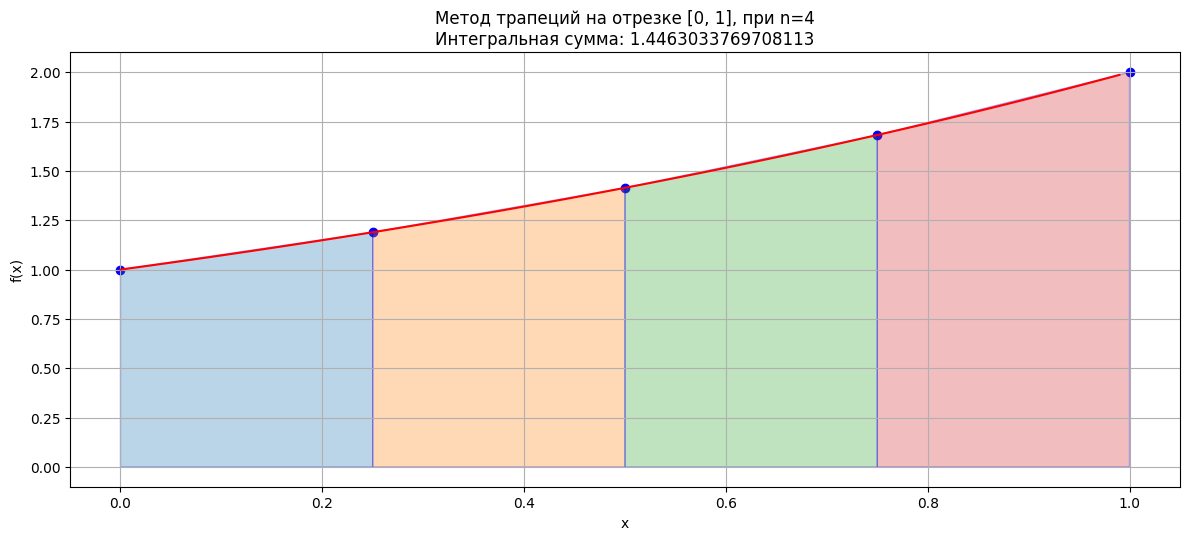

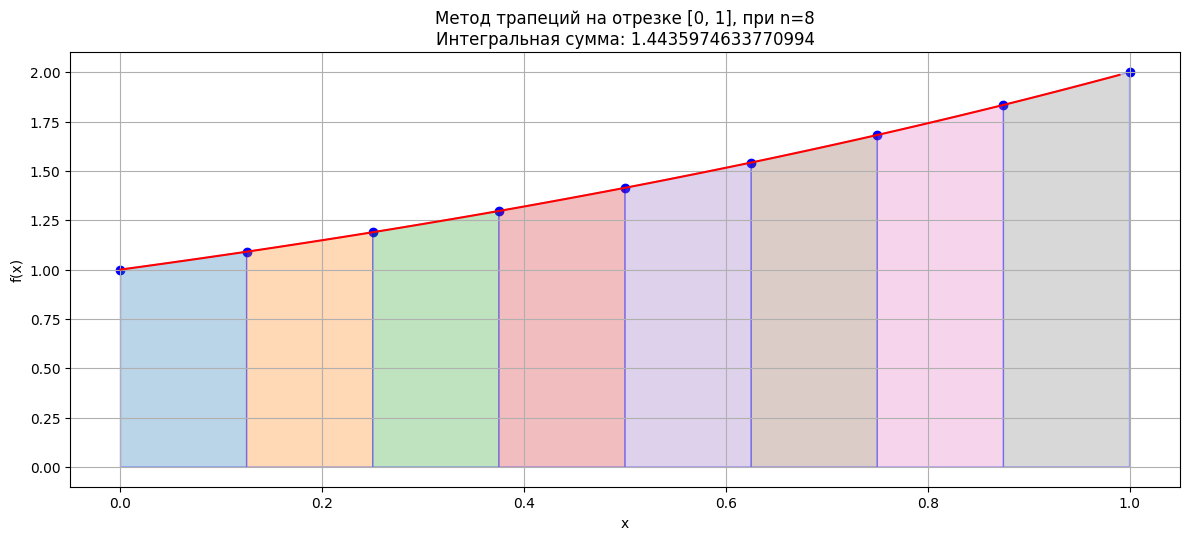

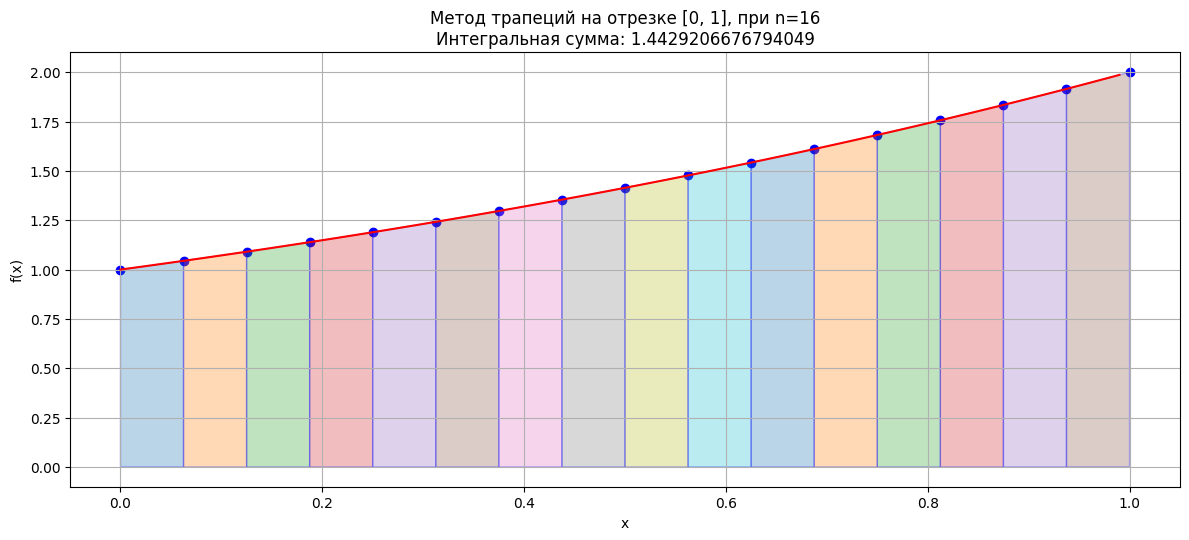

np.float64(1.4429206676794049)

In [ ]:
integral_trapezoid(f, a, b, 4, plot=True)
integral_trapezoid(f, a, b, 8, plot=True)
integral_trapezoid(f, a, b, 16, plot=True)

## 2.3. Метод Сипсона.

In [ ]:
def quadratic_by_formulas(x1, y1, x2, y2, x3, y3):
    denominator = (x3 - x1) * (x2 - x1) * (x3 - x2)
    a = ((y3 - y1) * (x2 - x1) - (y2 - y1) * (x3 - x1)) / denominator
    b = (y2 - y1) / (x2 - x1) - a * (x2 + x1)
    c = y1 - a * x1 ** 2 - b * x1
    return lambda x: a * x ** 2 + b * x + c


def integral_simpson(f, a, b, n, plot=False, **kwargs):
    x = get_partition(a, b, n, **kwargs)
    sm_integral = 0
    for i in range(0, n):
        sm_integral += (f(x[i]) + 4 * f((x[i + 1] + x[i]) / 2) + f(x[i + 1])) * (x[i + 1] - x[i]) / 6

    if plot:
        plt.figure(figsize=(12, 10))
        plt.subplot(2, 1, 1)
        plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
        plt.scatter(x, f(x), color='b')

        for i in range(0, n):
            x_left = x[i]
            x_right = x[i + 1]
            y_val_left = f(x_left)
            y_val_right = f(x_right)
            mid = (x_left + x_right) / 2
            y_val_mid = f(mid)
            q_b_f = quadratic_by_formulas(x_left, y_val_left, mid, y_val_mid, x_right, y_val_right)
            x_plot = np.linspace(x_left, x_right, 100)
            y_plot = q_b_f(x_plot)
            plt.plot(x_plot, y_plot, 'b-')
            plt.fill_between(x_plot, y_plot, alpha=0.3, edgecolor='b')

        plt.title(f"Метод Симпсона на отрезке [{a}, {b}], при n={n}\n"
                  f"Интегральная сумма: {sm_integral}")
        plt.tight_layout()
        plt.show()

    return sm_integral

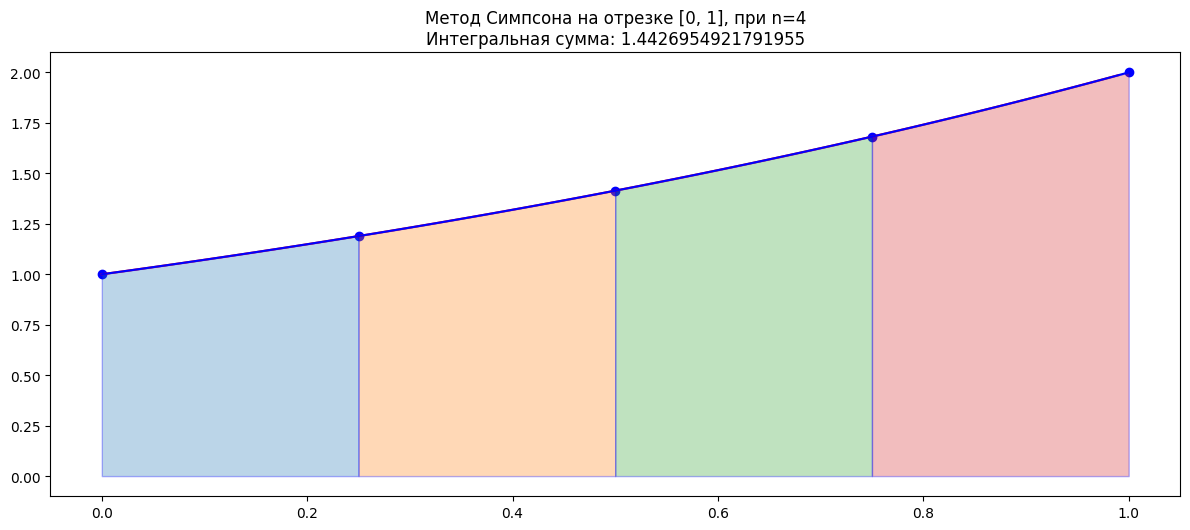

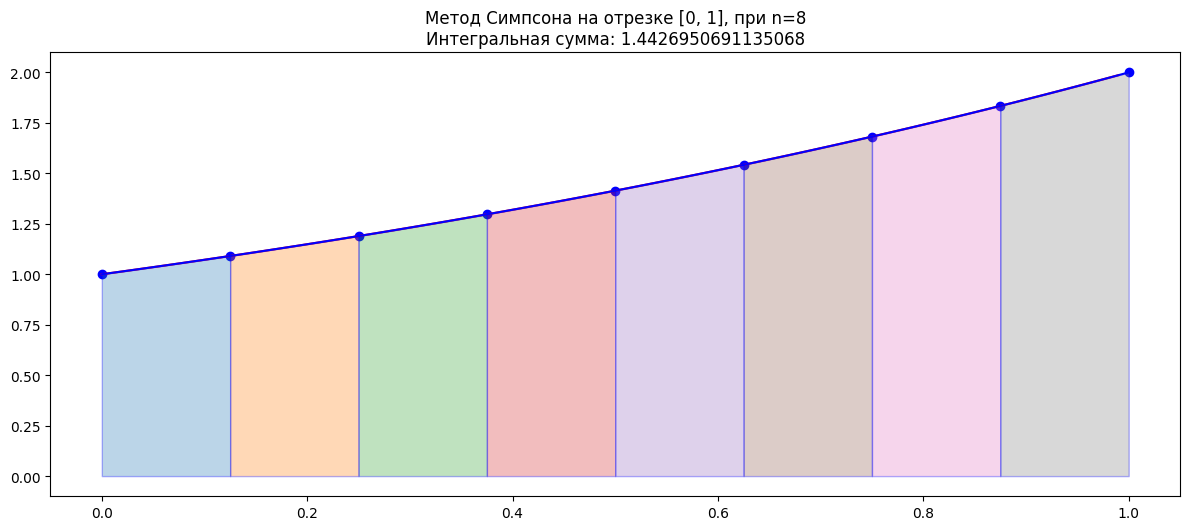

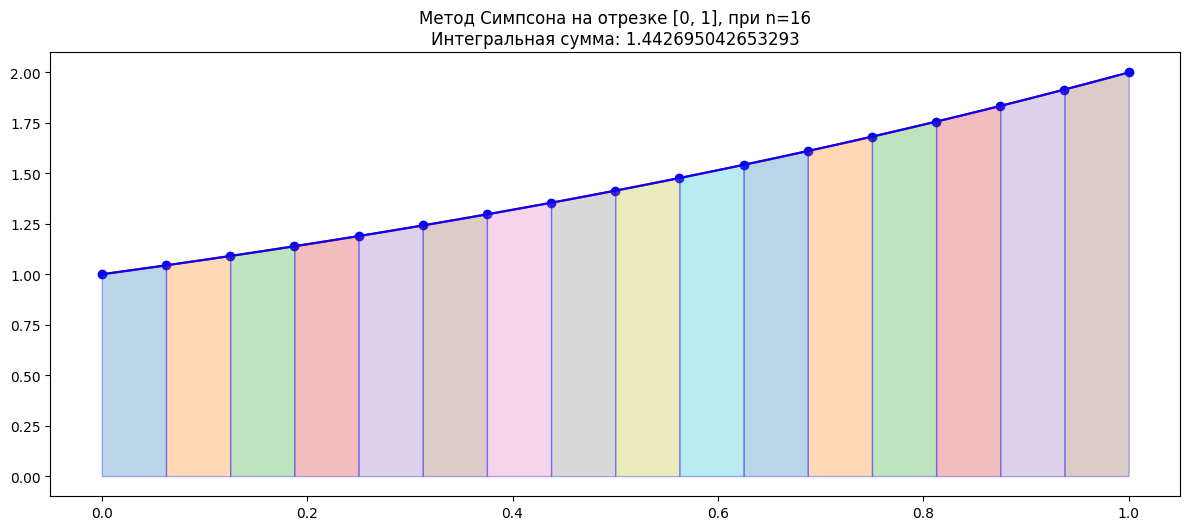

np.float64(1.442695042653293)

In [ ]:
integral_simpson(f, a, b, 4, plot=True)
integral_simpson(f, a, b, 8, plot=True)
integral_simpson(f, a, b, 16, plot=True)